In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
df=pd.read_csv("Cleaned_Sample_removed_cols.csv")
df.head()

,FlightDate,Airline,OriginAirport,DestAirport,Cancelled,Diverted,SchdDepTime,DepTime,DepDelayMinutes,DepDelay,...,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,SchdArrTime,ArrDelay,ArrivalDelayGroups,DistanceGroup,ArrDel15
0,24-03-2018,Hawaiian Airlines Inc.,LIH,HNL,False,False,1900,1855,0,-5,...,-1,6,1901,1920,7,1935,-8,-1,1,0
1,23-04-2018,Endeavor Air Inc.,BOS,PIT,False,False,2055,2111,16,16,...,1,22,2133,2253,23,2249,27,1,2,1
2,16-02-2018,Southwest Airlines Co.,HOU,ECP,False,False,1650,1728,38,38,...,2,16,1744,1859,4,1820,43,2,3,1
3,07-12-2018,Southwest Airlines Co.,MDW,MCO,False,False,1845,1851,6,6,...,0,9,1900,2207,7,2215,-1,-1,4,0
4,03-06-2018,Southwest Airlines Co.,LAS,LIT,False,False,1200,1201,1,1,...,0,7,1208,1637,2,1655,-16,-2,6,0


In [183]:
df.columns

Index(['FlightDate', 'Airline', 'OriginAirport', 'DestAirport', 'Cancelled',
       'Diverted', 'SchdDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay',
       'ArrTime', 'ArrDelayMinutes', 'AirTime', 'SchdElapsedTime',
       'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'Operating_Airline', 'OriginAirportID',
       'OriginCityName', 'OriginStateName', 'DestAirportID', 'DestCityName',
       'DestState', 'DestStateName', 'DepDel15', 'DepartureDelayGroups',
       'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'SchdArrTime', 'ArrDelay',
       'ArrivalDelayGroups', 'DistanceGroup', 'ArrDel15'],
      dtype='object')

In [184]:
import pandas as pd
import holidays

# Ensure SchdDepTime is in a 4-digit format
df['SchdDepTime'] = df['SchdDepTime'].astype(str).str.zfill(4)

# Extract hour from SchdDepTime
df['SchdDepHour'] = df['SchdDepTime'].str[:2].astype(int)

# Create time-of-day categories
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['SchdDepTimeOfDay'] = pd.cut(df['SchdDepHour'], bins=bins, labels=labels, right=False)

# Check for holidays
us_holidays = holidays.US()
df['IsHoliday'] = df['FlightDate'].apply(lambda x: x in us_holidays)

In [185]:
bins = [0, 15, 60, 120, 180, float('inf')]
labels = ['No Delay', 'Short Delay', 'Medium Delay', 'Long Delay', 'Very Long Delay']

# Create the DelayCategory column for arrival delay
df['DelayCategory'] = pd.cut(df['ArrDelayMinutes'], bins=bins, labels=labels, right=False)


In [186]:
df.head(30)

,FlightDate,Airline,OriginAirport,DestAirport,Cancelled,Diverted,SchdDepTime,DepTime,DepDelayMinutes,DepDelay,...,TaxiIn,SchdArrTime,ArrDelay,ArrivalDelayGroups,DistanceGroup,ArrDel15,SchdDepHour,SchdDepTimeOfDay,IsHoliday,DelayCategory
0,24-03-2018,Hawaiian Airlines Inc.,LIH,HNL,False,False,1900,1855,0,-5,...,7,1935,-8,-1,1,0,19,Evening,False,No Delay
1,23-04-2018,Endeavor Air Inc.,BOS,PIT,False,False,2055,2111,16,16,...,23,2249,27,1,2,1,20,Evening,False,Short Delay
2,16-02-2018,Southwest Airlines Co.,HOU,ECP,False,False,1650,1728,38,38,...,4,1820,43,2,3,1,16,Afternoon,False,Short Delay
3,07-12-2018,Southwest Airlines Co.,MDW,MCO,False,False,1845,1851,6,6,...,7,2215,-1,-1,4,0,18,Evening,False,No Delay
4,03-06-2018,Southwest Airlines Co.,LAS,LIT,False,False,1200,1201,1,1,...,2,1655,-16,-2,6,0,12,Afternoon,False,No Delay
5,07-08-2018,Southwest Airlines Co.,BWI,MHT,False,False,1055,1054,0,-1,...,5,1220,-9,-1,2,0,10,Morning,False,No Delay
6,09-02-2018,Mesa Airlines Inc.,IAH,CLT,False,False,1025,1022,0,-3,...,9,1355,-3,-1,4,0,10,Morning,False,No Delay
7,14-11-2018,United Air Lines Inc.,EWR,PDX,False,False,0845,839,0,-6,...,4,1201,0,0,10,0,8,Morning,False,No Delay
8,02-09-2018,American Airlines Inc.,PHX,GEG,False,False,1012,1002,0,-10,...,7,1254,10,0,5,0,10,Morning,False,No Delay
9,14-12-2018,Delta Air Lines Inc.,DTW,ORD,False,False,1558,1555,0,-3,...,14,1636,-17,-2,1,0,15,Afternoon,False,No Delay


In [187]:
df.columns

Index(['FlightDate', 'Airline', 'OriginAirport', 'DestAirport', 'Cancelled',
       'Diverted', 'SchdDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay',
       'ArrTime', 'ArrDelayMinutes', 'AirTime', 'SchdElapsedTime',
       'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'Operating_Airline', 'OriginAirportID',
       'OriginCityName', 'OriginStateName', 'DestAirportID', 'DestCityName',
       'DestState', 'DestStateName', 'DepDel15', 'DepartureDelayGroups',
       'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'SchdArrTime', 'ArrDelay',
       'ArrivalDelayGroups', 'DistanceGroup', 'ArrDel15', 'SchdDepHour',
       'SchdDepTimeOfDay', 'IsHoliday', 'DelayCategory'],
      dtype='object')

In [188]:
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)

In [189]:
df.head(40)

,FlightDate,Airline,OriginAirport,DestAirport,Cancelled,Diverted,SchdDepTime,DepTime,DepDelayMinutes,DepDelay,...,SchdArrTime,ArrDelay,ArrivalDelayGroups,DistanceGroup,ArrDel15,SchdDepHour,SchdDepTimeOfDay,IsHoliday,DelayCategory,IsWeekend
0,24-03-2018,Hawaiian Airlines Inc.,LIH,HNL,False,False,1900,1855,0,-5,...,1935,-8,-1,1,0,19,Evening,False,No Delay,1
1,23-04-2018,Endeavor Air Inc.,BOS,PIT,False,False,2055,2111,16,16,...,2249,27,1,2,1,20,Evening,False,Short Delay,0
2,16-02-2018,Southwest Airlines Co.,HOU,ECP,False,False,1650,1728,38,38,...,1820,43,2,3,1,16,Afternoon,False,Short Delay,0
3,07-12-2018,Southwest Airlines Co.,MDW,MCO,False,False,1845,1851,6,6,...,2215,-1,-1,4,0,18,Evening,False,No Delay,0
4,03-06-2018,Southwest Airlines Co.,LAS,LIT,False,False,1200,1201,1,1,...,1655,-16,-2,6,0,12,Afternoon,False,No Delay,1
5,07-08-2018,Southwest Airlines Co.,BWI,MHT,False,False,1055,1054,0,-1,...,1220,-9,-1,2,0,10,Morning,False,No Delay,0
6,09-02-2018,Mesa Airlines Inc.,IAH,CLT,False,False,1025,1022,0,-3,...,1355,-3,-1,4,0,10,Morning,False,No Delay,0
7,14-11-2018,United Air Lines Inc.,EWR,PDX,False,False,0845,839,0,-6,...,1201,0,0,10,0,8,Morning,False,No Delay,0
8,02-09-2018,American Airlines Inc.,PHX,GEG,False,False,1012,1002,0,-10,...,1254,10,0,5,0,10,Morning,False,No Delay,1
9,14-12-2018,Delta Air Lines Inc.,DTW,ORD,False,False,1558,1555,0,-3,...,1636,-17,-2,1,0,15,Afternoon,False,No Delay,0


In [190]:
### 4. Calculate Airport Congestion (Flights per Airport per Hour) ###
df['AirportCongestion'] = df.groupby(['OriginAirportID', 'SchdDepHour'])['FlightDate'].transform('count')

In [191]:
df.head(40)

,FlightDate,Airline,OriginAirport,DestAirport,Cancelled,Diverted,SchdDepTime,DepTime,DepDelayMinutes,DepDelay,...,ArrDelay,ArrivalDelayGroups,DistanceGroup,ArrDel15,SchdDepHour,SchdDepTimeOfDay,IsHoliday,DelayCategory,IsWeekend,AirportCongestion
0,24-03-2018,Hawaiian Airlines Inc.,LIH,HNL,False,False,1900,1855,0,-5,...,-8,-1,1,0,19,Evening,False,No Delay,1,5
1,23-04-2018,Endeavor Air Inc.,BOS,PIT,False,False,2055,2111,16,16,...,27,1,2,1,20,Evening,False,Short Delay,0,23
2,16-02-2018,Southwest Airlines Co.,HOU,ECP,False,False,1650,1728,38,38,...,43,2,3,1,16,Afternoon,False,Short Delay,0,27
3,07-12-2018,Southwest Airlines Co.,MDW,MCO,False,False,1845,1851,6,6,...,-1,-1,4,0,18,Evening,False,No Delay,0,24
4,03-06-2018,Southwest Airlines Co.,LAS,LIT,False,False,1200,1201,1,1,...,-16,-2,6,0,12,Afternoon,False,No Delay,1,62
5,07-08-2018,Southwest Airlines Co.,BWI,MHT,False,False,1055,1054,0,-1,...,-9,-1,2,0,10,Morning,False,No Delay,0,50
6,09-02-2018,Mesa Airlines Inc.,IAH,CLT,False,False,1025,1022,0,-3,...,-3,-1,4,0,10,Morning,False,No Delay,0,98
7,14-11-2018,United Air Lines Inc.,EWR,PDX,False,False,0845,839,0,-6,...,0,0,10,0,8,Morning,False,No Delay,0,75
8,02-09-2018,American Airlines Inc.,PHX,GEG,False,False,1012,1002,0,-10,...,10,0,5,0,10,Morning,False,No Delay,1,117
9,14-12-2018,Delta Air Lines Inc.,DTW,ORD,False,False,1558,1555,0,-3,...,-17,-2,1,0,15,Afternoon,False,No Delay,0,93


In [192]:
df.columns

Index(['FlightDate', 'Airline', 'OriginAirport', 'DestAirport', 'Cancelled',
       'Diverted', 'SchdDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay',
       'ArrTime', 'ArrDelayMinutes', 'AirTime', 'SchdElapsedTime',
       'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'Operating_Airline', 'OriginAirportID',
       'OriginCityName', 'OriginStateName', 'DestAirportID', 'DestCityName',
       'DestState', 'DestStateName', 'DepDel15', 'DepartureDelayGroups',
       'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'SchdArrTime', 'ArrDelay',
       'ArrivalDelayGroups', 'DistanceGroup', 'ArrDel15', 'SchdDepHour',
       'SchdDepTimeOfDay', 'IsHoliday', 'DelayCategory', 'IsWeekend',
       'AirportCongestion'],
      dtype='object')

In [193]:
# List of post-departure metrics to drop
post_departure_columns = [
    'DepTime',
    'ArrTime',
    'AirTime',
    'ActualElapsedTime',
    'TaxiOut',
    'WheelsOff',
    'WheelsOn',
    'TaxiIn',
    'DepDel15',
    'ArrDelayMinutes',
    'ArrivalDelayGroups',
    'Cancelled',
    'Diverted'
]

# Drop the columns
df = df.drop(columns=post_departure_columns)

In [194]:
df.columns

Index(['FlightDate', 'Airline', 'OriginAirport', 'DestAirport', 'SchdDepTime',
       'DepDelayMinutes', 'DepDelay', 'SchdElapsedTime', 'Distance', 'Year',
       'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Operating_Airline',
       'OriginAirportID', 'OriginCityName', 'OriginStateName', 'DestAirportID',
       'DestCityName', 'DestState', 'DestStateName', 'DepartureDelayGroups',
       'SchdArrTime', 'ArrDelay', 'DistanceGroup', 'ArrDel15', 'SchdDepHour',
       'SchdDepTimeOfDay', 'IsHoliday', 'DelayCategory', 'IsWeekend',
       'AirportCongestion'],
      dtype='object')

In [195]:
redundant_with_airport_codes=["OriginCityName", "OriginStateName", "DestCityName", "DestStateName","DestState"]
df = df.drop(columns=redundant_with_airport_codes)

In [196]:
df.columns

Index(['FlightDate', 'Airline', 'OriginAirport', 'DestAirport', 'SchdDepTime',
       'DepDelayMinutes', 'DepDelay', 'SchdElapsedTime', 'Distance', 'Year',
       'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Operating_Airline',
       'OriginAirportID', 'DestAirportID', 'DepartureDelayGroups',
       'SchdArrTime', 'ArrDelay', 'DistanceGroup', 'ArrDel15', 'SchdDepHour',
       'SchdDepTimeOfDay', 'IsHoliday', 'DelayCategory', 'IsWeekend',
       'AirportCongestion'],
      dtype='object')

In [197]:
also_redundant=["Operating_Airline",   # redundant with Airline.
           "DistanceGroup"]            #Redundant with Distance

df=df.drop(columns=also_redundant)

In [198]:
df.columns

Index(['FlightDate', 'Airline', 'OriginAirport', 'DestAirport', 'SchdDepTime',
       'DepDelayMinutes', 'DepDelay', 'SchdElapsedTime', 'Distance', 'Year',
       'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'OriginAirportID',
       'DestAirportID', 'DepartureDelayGroups', 'SchdArrTime', 'ArrDelay',
       'ArrDel15', 'SchdDepHour', 'SchdDepTimeOfDay', 'IsHoliday',
       'DelayCategory', 'IsWeekend', 'AirportCongestion'],
      dtype='object')

In [199]:
drop_col=["DepDelayMinutes","DepDelay","DepartureDelayGroups","ArrDelay","ArrDel15"]
df=df.drop(columns=drop_col)

In [200]:
df.columns

Index(['FlightDate', 'Airline', 'OriginAirport', 'DestAirport', 'SchdDepTime',
       'SchdElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth',
       'DayOfWeek', 'OriginAirportID', 'DestAirportID', 'SchdArrTime',
       'SchdDepHour', 'SchdDepTimeOfDay', 'IsHoliday', 'DelayCategory',
       'IsWeekend', 'AirportCongestion'],
      dtype='object')

In [201]:
df=df.drop(columns="SchdElapsedTime")   #it can be derived from SchdDepTime and SchdArrTime

In [202]:
df.columns

Index(['FlightDate', 'Airline', 'OriginAirport', 'DestAirport', 'SchdDepTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'OriginAirportID', 'DestAirportID', 'SchdArrTime', 'SchdDepHour',
       'SchdDepTimeOfDay', 'IsHoliday', 'DelayCategory', 'IsWeekend',
       'AirportCongestion'],
      dtype='object')

In [203]:
df=df.drop(columns=["OriginAirport","DestAirport"])     #redundant with destairportid and originairportid

In [204]:
df.columns

Index(['FlightDate', 'Airline', 'SchdDepTime', 'Distance', 'Year', 'Quarter',
       'Month', 'DayofMonth', 'DayOfWeek', 'OriginAirportID', 'DestAirportID',
       'SchdArrTime', 'SchdDepHour', 'SchdDepTimeOfDay', 'IsHoliday',
       'DelayCategory', 'IsWeekend', 'AirportCongestion'],
      dtype='object')

In [205]:
df=df.drop(columns=["SchdDepTime"])     #redundant with schdDepHour,SchdDeptTimeofDay

In [206]:
df=df.drop(columns=["FlightDate"])

In [207]:
df.to_csv('final.csv', index=False)


In [208]:
print(df.isnull().sum())

Airline              0
Distance             0
Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
OriginAirportID      0
DestAirportID        0
SchdArrTime          0
SchdDepHour          0
SchdDepTimeOfDay     0
IsHoliday            0
DelayCategory        0
IsWeekend            0
AirportCongestion    0
dtype: int64


In [209]:
print(df.dtypes)

Airline                object
Distance                int64
Year                    int64
Quarter                 int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
OriginAirportID         int64
DestAirportID           int64
SchdArrTime             int64
SchdDepHour             int64
SchdDepTimeOfDay     category
IsHoliday                bool
DelayCategory        category
IsWeekend               int64
AirportCongestion       int64
dtype: object


In [210]:
# One-hot encode 'SchdDepTimeOfDay'
df = pd.get_dummies(df, columns=['SchdDepTimeOfDay'], drop_first=True)

# Label encode 'DelayCategory' (assuming it's the target column)
label_encoder = LabelEncoder()
df['DelayCategory'] = label_encoder.fit_transform(df['DelayCategory'])

In [211]:
df = pd.get_dummies(df, columns=['Airline'], drop_first=True)

In [212]:
print(df.dtypes)

Distance                                             int64
Year                                                 int64
Quarter                                              int64
Month                                                int64
DayofMonth                                           int64
DayOfWeek                                            int64
OriginAirportID                                      int64
DestAirportID                                        int64
SchdArrTime                                          int64
SchdDepHour                                          int64
IsHoliday                                             bool
DelayCategory                                        int64
IsWeekend                                            int64
AirportCongestion                                    int64
SchdDepTimeOfDay_Morning                              bool
SchdDepTimeOfDay_Afternoon                            bool
SchdDepTimeOfDay_Evening                              bo

In [213]:
# Convert all boolean columns to 0 and 1
bool_columns = ['SchdDepTimeOfDay_Morning', 'SchdDepTimeOfDay_Afternoon', 'SchdDepTimeOfDay_Evening'] + \
               [col for col in df.columns if 'Airline' in col]

df[bool_columns] = df[bool_columns].astype(int)


In [214]:
print(df.dtypes)

Distance                                             int64
Year                                                 int64
Quarter                                              int64
Month                                                int64
DayofMonth                                           int64
DayOfWeek                                            int64
OriginAirportID                                      int64
DestAirportID                                        int64
SchdArrTime                                          int64
SchdDepHour                                          int64
IsHoliday                                             bool
DelayCategory                                        int64
IsWeekend                                            int64
AirportCongestion                                    int64
SchdDepTimeOfDay_Morning                             int64
SchdDepTimeOfDay_Afternoon                           int64
SchdDepTimeOfDay_Evening                             int

In [215]:
df["IsHoliday"] = df["IsHoliday"].astype(int)

In [216]:
print(df.dtypes)

Distance                                             int64
Year                                                 int64
Quarter                                              int64
Month                                                int64
DayofMonth                                           int64
DayOfWeek                                            int64
OriginAirportID                                      int64
DestAirportID                                        int64
SchdArrTime                                          int64
SchdDepHour                                          int64
IsHoliday                                            int64
DelayCategory                                        int64
IsWeekend                                            int64
AirportCongestion                                    int64
SchdDepTimeOfDay_Morning                             int64
SchdDepTimeOfDay_Afternoon                           int64
SchdDepTimeOfDay_Evening                             int

Correlation with DelayCategory:
DelayCategory                                        1.000000
Airline_Southwest Airlines Co.                       0.021086
Distance                                             0.021033
SchdDepHour                                          0.020786
SchdArrTime                                          0.014802
SchdDepTimeOfDay_Afternoon                           0.011690
SchdDepTimeOfDay_Evening                             0.011577
Airline_American Airlines Inc.                       0.010416
Airline_Peninsula Airways Inc.                       0.007922
Airline_Allegiant Air                                0.006480
DestAirportID                                        0.005750
Airline_Alaska Airlines Inc.                         0.005593
Airline_United Air Lines Inc.                        0.004898
IsHoliday                                            0.004866
Airline_Commutair Aka Champlain Enterprises, Inc.    0.004723
Year                                  

<ipython-input-217-4841aefa1aed>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


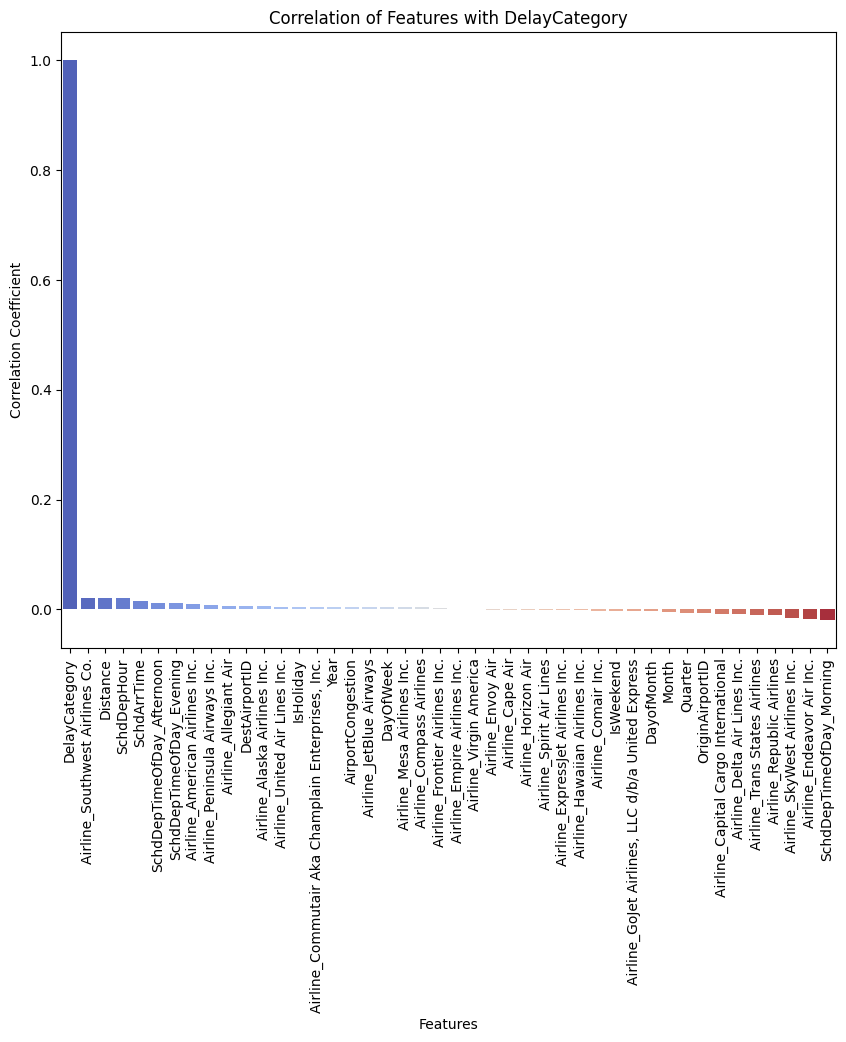

In [217]:
corr_matrix = df.corr()

# Step 2: Extract correlations with the target variable (ArrDelayMinutes)
target_corr = corr_matrix['DelayCategory'].sort_values(ascending=False)

# Display the correlations with the target variable
print("Correlation with DelayCategory:")
print(target_corr)

# Step 3: Visualize the correlations using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlation of Features with DelayCategory")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

In [218]:
# Define features (X) and target (y)
X = df.drop('DelayCategory', axis=1)
y = df['DelayCategory']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(38733, 43) (9684, 43) (38733,) (9684,)


In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [222]:
# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8254
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.00      0.00      0.00       358
           2       0.83      1.00      0.90      7993
           3       0.00      0.00      0.00      1096
           4       0.00      0.00      0.00       117

    accuracy                           0.83      9684
   macro avg       0.17      0.20      0.18      9684
weighted avg       0.68      0.83      0.75      9684



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [223]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8234
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.00      0.00      0.00       358
           2       0.83      1.00      0.90      7993
           3       0.00      0.00      0.00      1096
           4       0.00      0.00      0.00       117

    accuracy                           0.82      9684
   macro avg       0.17      0.20      0.18      9684
weighted avg       0.68      0.82      0.75      9684



In [224]:
# Initialize the model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8091
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.04      0.01      0.01       358
           2       0.83      0.98      0.90      7993
           3       0.11      0.02      0.03      1096
           4       0.00      0.00      0.00       117

    accuracy                           0.81      9684
   macro avg       0.20      0.20      0.19      9684
weighted avg       0.70      0.81      0.74      9684



In [231]:
# Initialize the model
svm = SVC(random_state=42,probability=True)

# Train the model
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8254
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.00      0.00      0.00       358
           2       0.83      1.00      0.90      7993
           3       0.00      0.00      0.00      1096
           4       0.00      0.00      0.00       117

    accuracy                           0.83      9684
   macro avg       0.17      0.20      0.18      9684
weighted avg       0.68      0.83      0.75      9684



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [226]:
# Initialize the model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:32:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8235
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.00      0.00      0.00       358
           2       0.83      1.00      0.90      7993
           3       0.27      0.01      0.02      1096
           4       0.00      0.00      0.00       117

    accuracy                           0.82      9684
   macro avg       0.22      0.20      0.19      9684
weighted avg       0.71      0.82      0.75      9684



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [227]:
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"KNN Accuracy: {accuracy_knn:.4f}")

Logistic Regression Accuracy: 0.8254
Random Forest Accuracy: 0.8234
XGBoost Accuracy: 0.8235
SVM Accuracy: 0.8254
KNN Accuracy: 0.8091


In [241]:
custom_input = {
    'Airline': 'Mesa Airlines Inc.',  # Categorical (must match your dataset's airline categories)
    'Distance': 1000,                    # Numeric
    'Year': 2020,                       # Numeric
    'Quarter': 3,                       # Numeric
    'Month': 7,                         # Numeric
    'DayofMonth': 15,                   # Numeric
    'DayOfWeek': 4,                     # Numeric (1-7)
    'OriginAirportID': 12266,           # Numeric
    'DestAirportID': 11057,             # Numeric
    'SchdArrTime': 1500,                # Numeric (e.g., 1500 for 3:00 PM)
    'SchdDepHour': 23,                  # Numeric (e.g., 10 for 10 AM)
    'SchdDepTimeOfDay': 'Evening',      # Categorical (Morning/Afternoon/Evening)
    'IsHoliday': True,                 # Boolean
    'IsWeekend': 1,                     # Numeric (0 or 1)
    'AirportCongestion': 50              # Numeric
}

In [242]:
import pandas as pd

# Convert custom input to DataFrame
custom_df = pd.DataFrame([custom_input])

# One-hot encode categorical features (e.g., SchdDepTimeOfDay and Airline)
custom_df = pd.get_dummies(custom_df, columns=['SchdDepTimeOfDay', 'Airline'])

# Ensure all columns match training data (add missing columns with 0)
# Get columns from the original training data
training_columns = X_train.columns

# Add missing columns to custom_df and set to 0
for col in training_columns:
    if col not in custom_df.columns:
        custom_df[col] = 0

# Reorder columns to match training data
custom_df = custom_df[training_columns]

In [243]:
# Predict with Logistic Regression
log_reg_pred = log_reg.predict(custom_df)
log_reg_proba = log_reg.predict_proba(custom_df)  # Confidence scores (optional)

# Predict with SVM
svm_pred = svm.predict(custom_df)

# Decode predictions (if you used LabelEncoder for DelayCategory)
predicted_class_log_reg = label_encoder.inverse_transform(log_reg_pred)
predicted_class_svm = label_encoder.inverse_transform(svm_pred)

print("Logistic Regression Prediction:", predicted_class_log_reg[0])
print("SVM Prediction:", predicted_class_svm[0])

Logistic Regression Prediction: No Delay
SVM Prediction: No Delay


In [244]:
# Predict probabilities with Logistic Regression
log_reg_proba = log_reg.predict_proba(custom_df)

# Predict probabilities with SVM
svm_proba = svm.predict_proba(custom_df)

# Get class labels (if you used LabelEncoder)
class_labels = label_encoder.classes_

# Combine probabilities with class labels
log_reg_results = dict(zip(class_labels, log_reg_proba[0] * 100))
svm_results = dict(zip(class_labels, svm_proba[0] * 100))

# Print results
print("Logistic Regression Probabilities:")
for label, prob in log_reg_results.items():
    print(f"{label}: {prob:.2f}%")

print("\nSVM Probabilities:")
for label, prob in svm_results.items():
    print(f"{label}: {prob:.2f}%")

Logistic Regression Probabilities:
Long Delay: 1.33%
Medium Delay: 3.99%
No Delay: 79.25%
Short Delay: 14.18%
Very Long Delay: 1.25%

SVM Probabilities:
Long Delay: 1.29%
Medium Delay: 3.87%
No Delay: 81.37%
Short Delay: 12.53%
Very Long Delay: 0.96%
